# Multiple Linear Regression

## 1. Importing the libraries

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import f
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Importing the dataset

In [2]:
# Reads CSV file
dataset = pd.read_csv('Dataset/medical_insurance_raw.csv')

In [3]:
dataset.sample(10)

,age,sex,bmi,children,smoker,region,charges
2230,53,male,30.495,0,no,northeast,10072.05505
100,41,female,31.600,0,no,southwest,6186.12700
394,46,female,32.300,2,no,northeast,9411.00500
2142,39,female,22.800,3,no,northeast,7985.81500
2075,27,male,31.130,1,yes,southeast,34806.46770
1367,32,male,37.180,2,no,southeast,4673.39220
95,28,female,37.620,1,no,southeast,3766.88380
1270,26,male,33.915,1,no,northwest,3292.52985
137,22,male,25.175,0,no,northwest,2045.68525
2619,58,male,23.300,0,no,southwest,11345.51900


In [4]:
dataset.shape

(2772, 7)

## 3. Data Cleaning

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### Therefore, Dataset is already cleaned

## 4. Encoding Categorical data into numerical data by introducing dummy variables

In [6]:
# Encoding Categorical data into numerical data by introducing dummy variables
df = pd.get_dummies(data=dataset, columns=['sex', 'smoker', 'region'], drop_first=True,dtype=int)

# Renaming the columns
df = df.rename(columns={'sex_male': 'sex', 'smoker_yes': 'smoker','smoker_yes': 'smoker','region_northwest': 'region1',
                          'region_southeast': 'region2','region_southwest': 'region3'})
df.sample(10)

,age,bmi,children,charges,sex,smoker,region1,region2,region3
318,44,27.645,0,7421.19455,0,0,1,0,0
1174,29,32.110,2,4433.91590,1,0,1,0,0
2393,47,28.215,3,24915.22085,1,1,1,0,0
1717,52,27.360,0,24393.62240,1,1,1,0,0
125,26,28.785,0,3385.39915,0,0,0,0,0
540,34,38.000,3,6196.44800,0,0,0,0,1
154,40,25.460,1,7077.18940,0,0,0,0,0
2410,47,45.320,1,8569.86180,0,0,0,1,0
2207,26,17.670,0,2680.94930,1,0,1,0,0
1310,42,26.315,1,6940.90985,1,0,1,0,0


In [7]:
# Check For Missing Values
df.isnull().sum()

age         0
bmi         0
children    0
charges     0
sex         0
smoker      0
region1     0
region2     0
region3     0
dtype: int64

In [8]:
# For R
# Define the desired column order
desired_columns = ['charges', 'age'	, 'bmi',	'children',	'sex',	'smoker', 'region1',	'region2',	'region3']
# Reorder columns
df_mod = df.reindex(columns=desired_columns)
df_mod.to_csv('Dataset/medical_insurance_modified_1.csv', index=False)

# Converting Categorical Features to Numerical
converted_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
dataset_mod = dataset.copy()
dataset_mod.replace(converted_data, inplace=True)
desired_columns = ['charges', 'age'	, 'bmi',	'children',	'sex',	'smoker', 'region']
dataset_mod = dataset_mod.reindex(columns=desired_columns)
dataset_mod.to_csv('Dataset/medical_insurance_modified_2.csv', index=False)

C:\Users\shara\AppData\Local\Temp\ipykernel_4868\2755841181.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_mod.replace(converted_data, inplace=True)


In [9]:
df.shape

(2772, 9)

## 5. EDA

In [10]:
df.head()

,age,bmi,children,charges,sex,smoker,region1,region2,region3
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


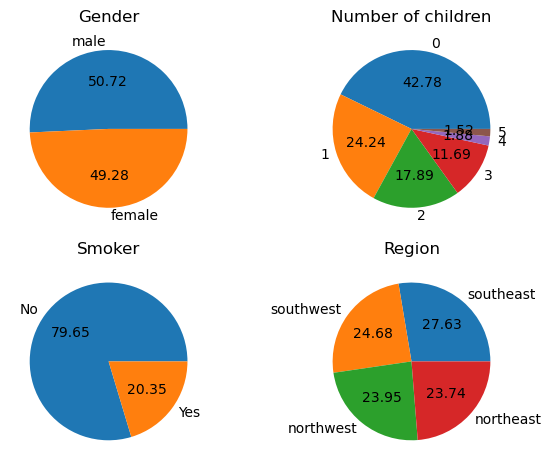

In [11]:
# Data visualization

plt.subplot(2, 2, 1)
plt.pie(dataset['sex'].value_counts(),labels=['male','female'],autopct="%0.2f")
plt.title('Gender')

plt.subplot(2, 2, 2)
plt.pie(dataset['children'].value_counts(),labels=[0,1,2,3,4,5],autopct="%0.2f")
plt.title('Number of children')

plt.subplot(2, 2, 3)
plt.pie(dataset['smoker'].value_counts(),labels=['No','Yes'],autopct="%0.2f")
plt.title('Smoker')

plt.subplot(2, 2, 4)
plt.pie(dataset['region'].value_counts(),labels=['southeast','southwest','northwest','northeast'],autopct="%0.2f")
plt.title('Region')

# space between the plots
plt.tight_layout()

# show plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


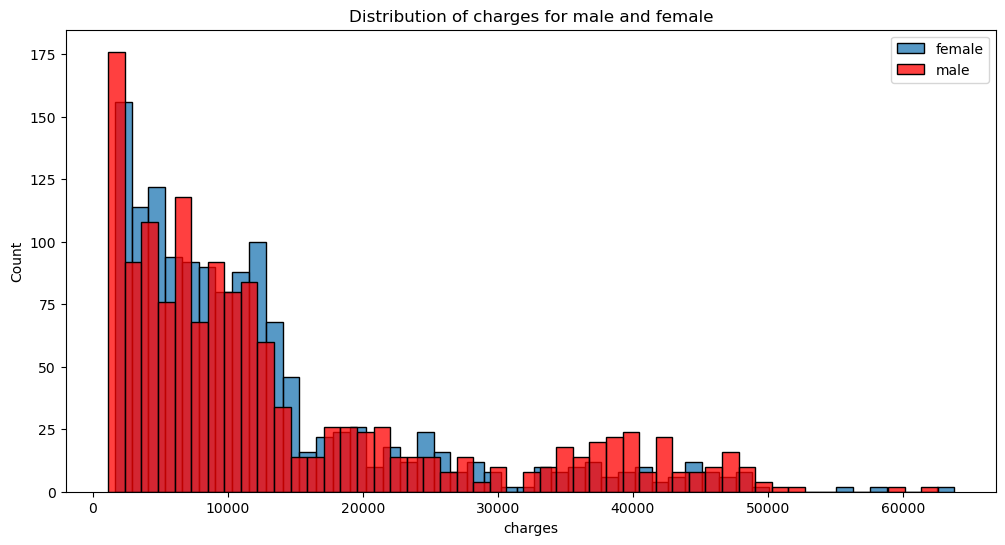

In [12]:
# Distribution of charges for male and female
plt.figure(figsize=(12,6))
plt.title('Distribution of charges for male and female')
sns.histplot(df[df['sex'] == 0]['charges'],bins=50, label = 'female')
sns.histplot(df[df['sex'] == 1]['charges'],bins = 50, color = 'red', label = 'male')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


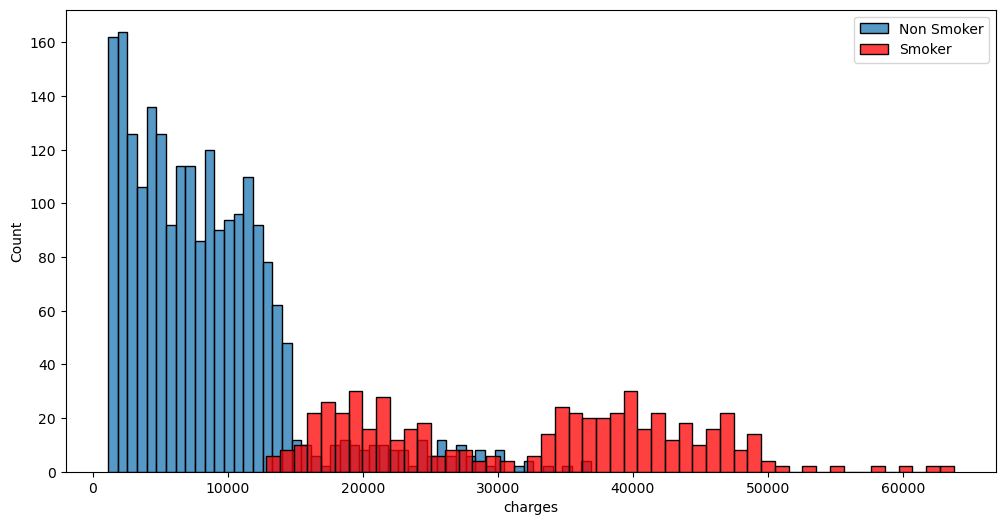

In [13]:
# Distribution of charges for smoker and nonsmoker
plt.figure(figsize=(12,6))
sns.histplot(df[df['smoker'] == 0]['charges'],bins=50,label='Non Smoker')
sns.histplot(df[df['smoker'] == 1]['charges'],bins=50, color = 'red',label='Smoker')
plt.legend()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

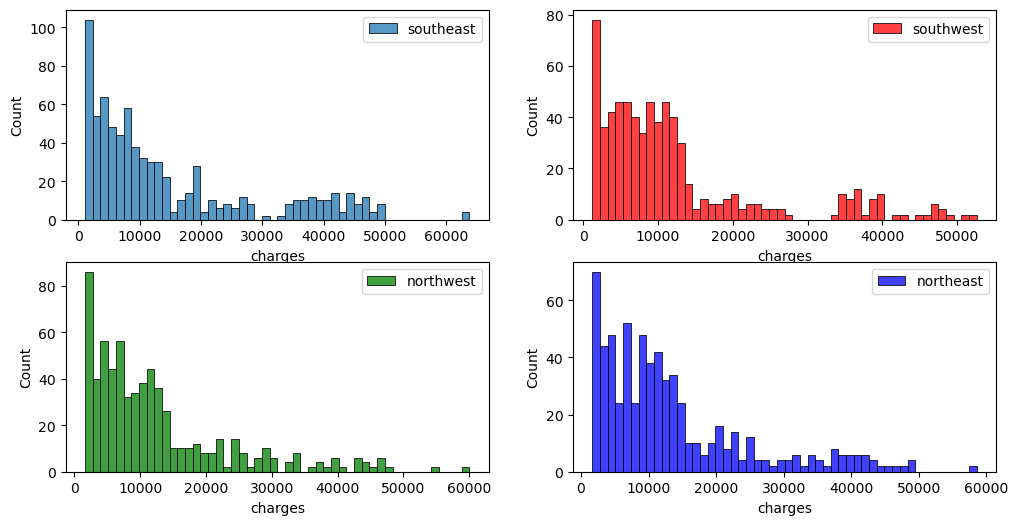

In [14]:
# Distribution of charges region basis
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
sns.histplot(dataset[dataset['region'] == 'southeast']['charges'], bins=50, label='southeast')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(dataset[dataset['region'] == 'southwest']['charges'], bins=50, label='southwest', color='red')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(dataset[dataset['region'] == 'northwest']['charges'], bins=50, label='northwest', color='green')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(dataset[dataset['region'] == 'northeast']['charges'], bins=50, label='northeast', color='blue')
plt.legend()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

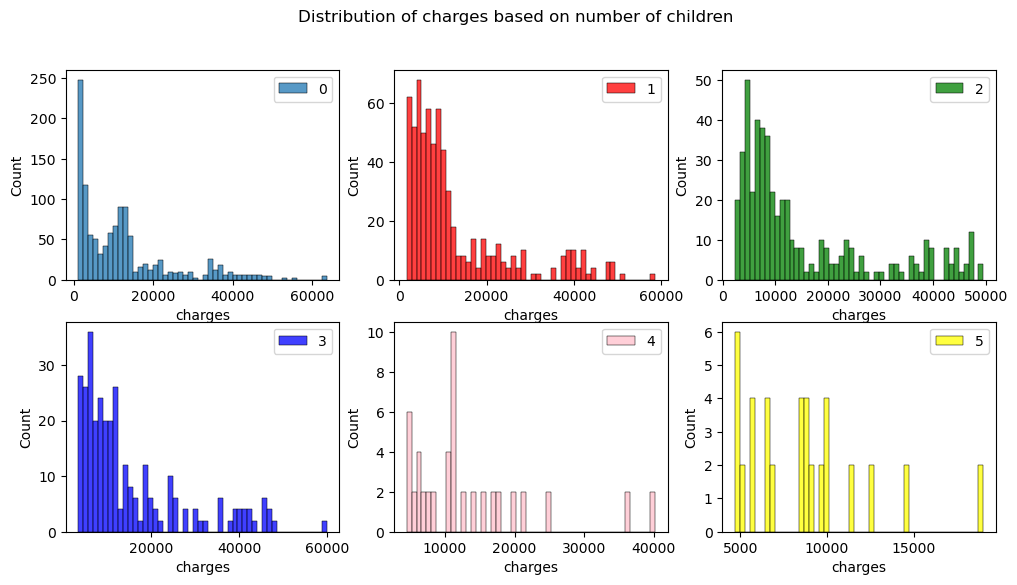

In [15]:
# Distribution of charges based on number of children
fig, ax = plt.subplots(2, 3, figsize=(12,6))
plt.subplot(2, 3, 1)
sns.histplot(df[df['children'] == 0]['charges'],bins=50,label='0')
plt.legend()
plt.subplot(2, 3, 2)
sns.histplot(df[df['children'] == 1]['charges'],bins=50, color = 'red',label='1')
plt.legend()
plt.subplot(2, 3, 3)
sns.histplot(df[df['children'] == 2]['charges'],bins=50, color = 'green',label='2')
plt.legend()
plt.subplot(2, 3, 4)
sns.histplot(df[df['children'] == 3]['charges'],bins=50, color = 'blue',label='3')
plt.legend()
plt.subplot(2, 3, 5)
sns.histplot(df[df['children'] == 4]['charges'],bins=50, color = 'pink',label='4')
plt.legend()
plt.subplot(2, 3, 6)
sns.histplot(df[df['children'] == 5]['charges'],bins=50, color = 'yellow',label='5')
plt.legend()
fig.suptitle('Distribution of charges based on number of children')
plt.show()

In [16]:
df.describe()

,age,bmi,children,charges,sex,smoker,region1,region2,region3
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959,0.507215,0.203463,0.239538,0.276335,0.246753
std,14.081459,6.129449,1.214806,12151.768945,0.500038,0.402647,0.426879,0.447265,0.431200
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.797000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.447500,1.000000,9333.014350,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.770000,2.000000,16577.779500,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


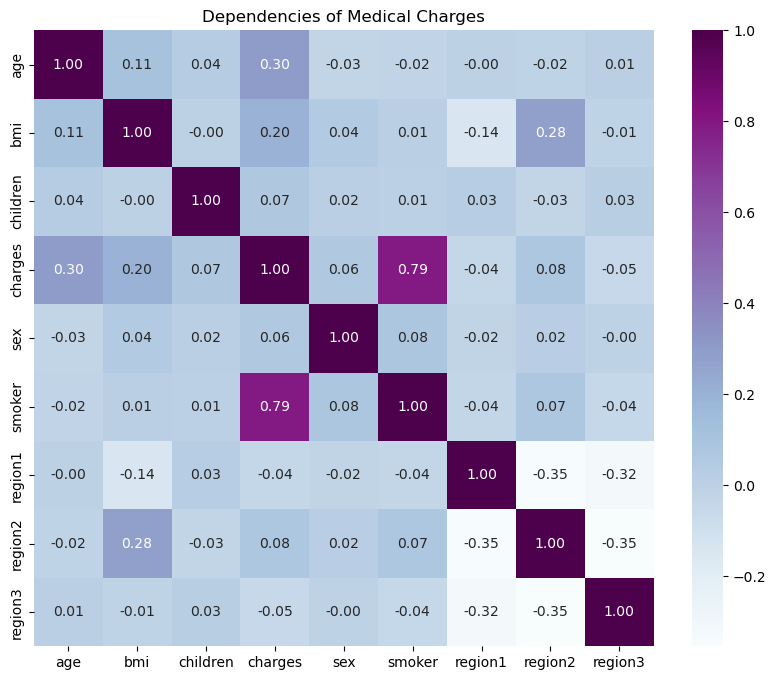

In [17]:
# Correlation Matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
# plt.savefig('./sampleImages/Cor')
plt.show()

Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges.

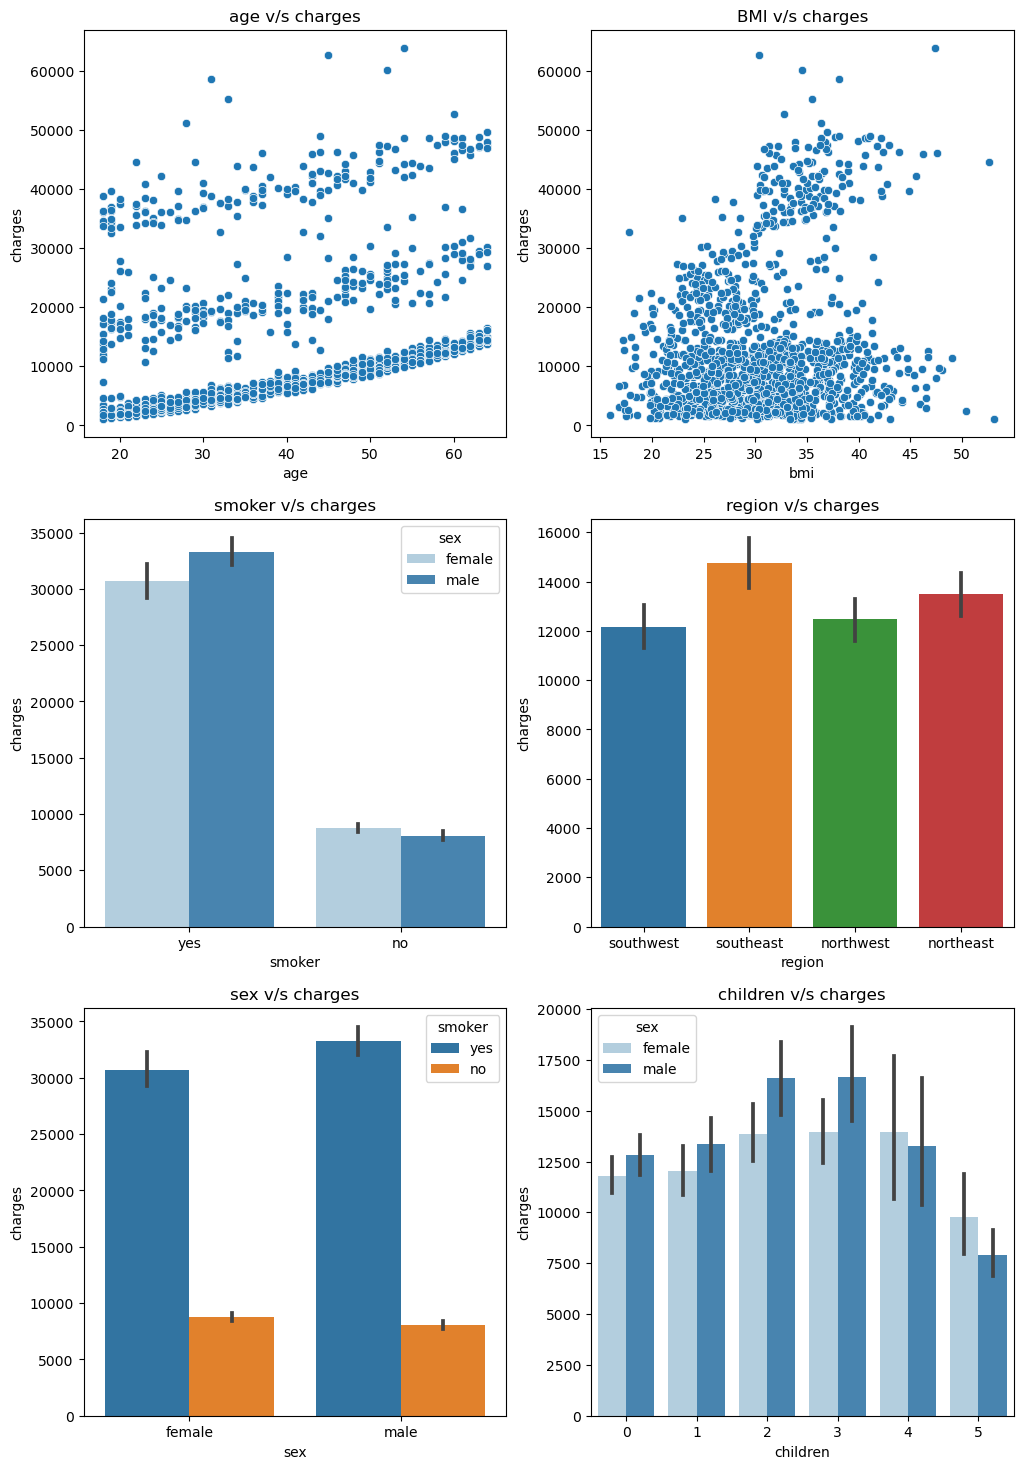

In [18]:
# Scatter and bar plots
fig, ax = plt.subplots(3, 2, figsize=(12,18))
plt.subplot(3, 2, 1)
sns.scatterplot(x='age',y='charges' ,data=dataset).set(title='age v/s charges')
plt.subplot(3, 2, 2)
sns.scatterplot(x='bmi',y='charges' ,data=dataset).set(title='BMI v/s charges')
plt.subplot(3, 2, 3)
sns.barplot(x='smoker',y='charges',data=dataset, palette='Blues',hue='sex').set(title='smoker v/s charges')
plt.subplot(3, 2, 4)
sns.barplot(x='region',y='charges',data=dataset).set(title='region v/s charges')
plt.subplot(3, 2, 5)
sns.barplot(x='sex', y='charges', hue='smoker', data=dataset).set(title='sex v/s charges')
plt.subplot(3, 2, 6)
sns.barplot(x='children',y='charges',data=dataset, palette='Blues',hue='sex').set(title='children v/s charges')
plt.show()

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

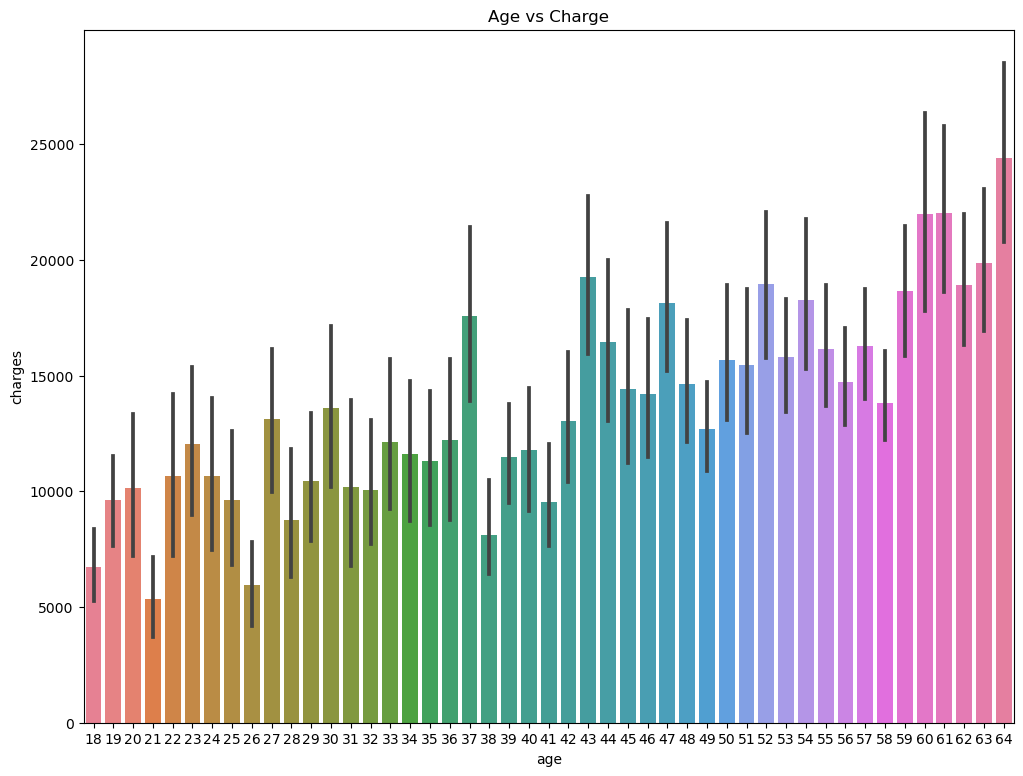

In [19]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')

In [20]:
# Means of numerical features
print("Meam\n",dataset.iloc[:, [0, 2, 3, 6]].mean())
# Standard Deviation
print("\nStandard Deviation\n",dataset.iloc[:, [0, 2, 3, 6]].std())

Meam
 age            39.109668
bmi            30.701349
children        1.101732
charges     13261.369959
dtype: float64

Standard Deviation
 age            14.081459
bmi             6.129449
children        1.214806
charges     12151.768945
dtype: float64


In [21]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(df.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,df[col].skew(),df[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.062 and  Kurtosis -1.253
bmi : Skewness 0.280 and  Kurtosis -0.090
children : Skewness 0.955 and  Kurtosis 0.259
charges : Skewness 1.511 and  Kurtosis 1.566
sex : Skewness -0.029 and  Kurtosis -2.001
smoker : Skewness 1.474 and  Kurtosis 0.173
region1 : Skewness 1.221 and  Kurtosis -0.509
region2 : Skewness 1.001 and  Kurtosis -0.999
region3 : Skewness 1.175 and  Kurtosis -0.619


C:\Users\shara\AppData\Local\Temp\ipykernel_4868\2198048122.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins=len(set(df['age'])), norm_hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

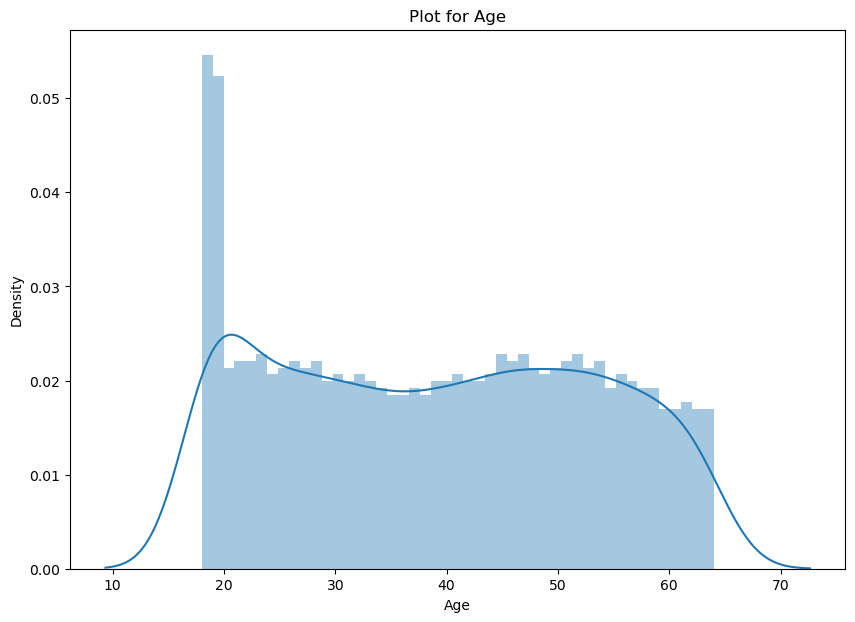

In [22]:
# Distribution of Age
plt.figure(figsize=(10,7))
sns.distplot(df['age'],bins=len(set(df['age'])), norm_hist=False)
plt.title('Plot for Age')
plt.xlabel('Age')
# plt.savefig('agedist.png')

C:\Users\shara\AppData\Local\Temp\ipykernel_4868\585175482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'BMI')

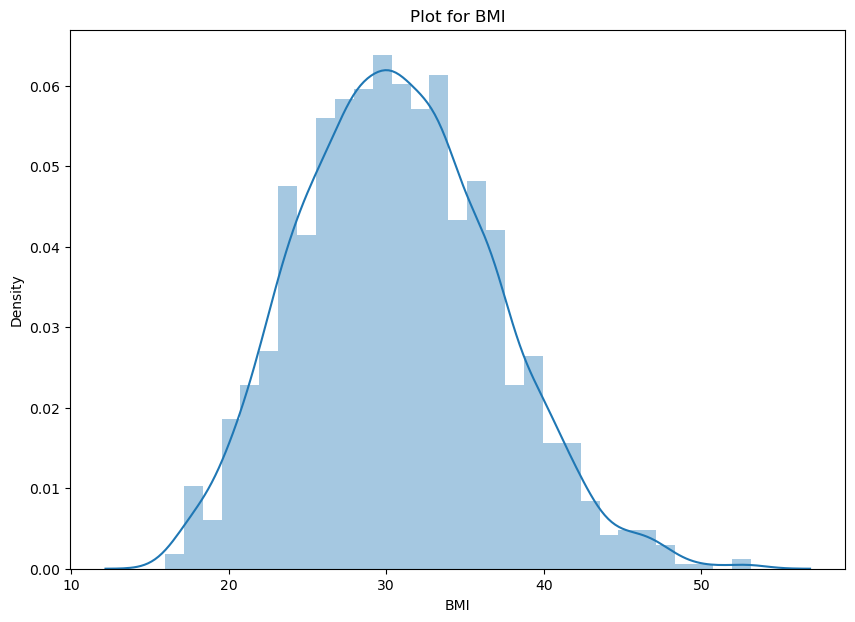

In [23]:
# Distribution of BMI
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
# plt.savefig('bmidist.png')

C:\Users\shara\AppData\Local\Temp\ipykernel_4868\906028751.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'charges')

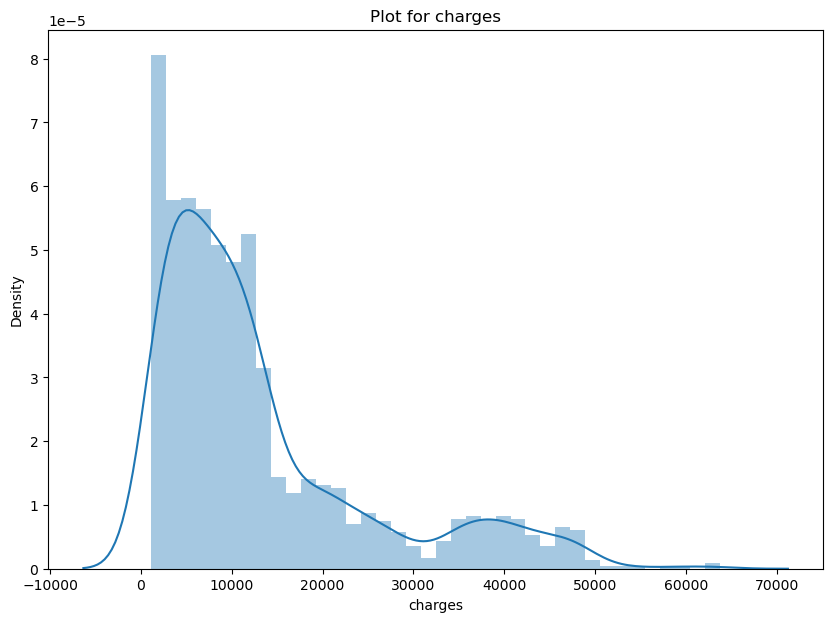

In [24]:
# Distribution of Charges
plt.figure(figsize=(10,7))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
# plt.savefig('chargedist.png')

There may be some outliers but they may contain important infornmations

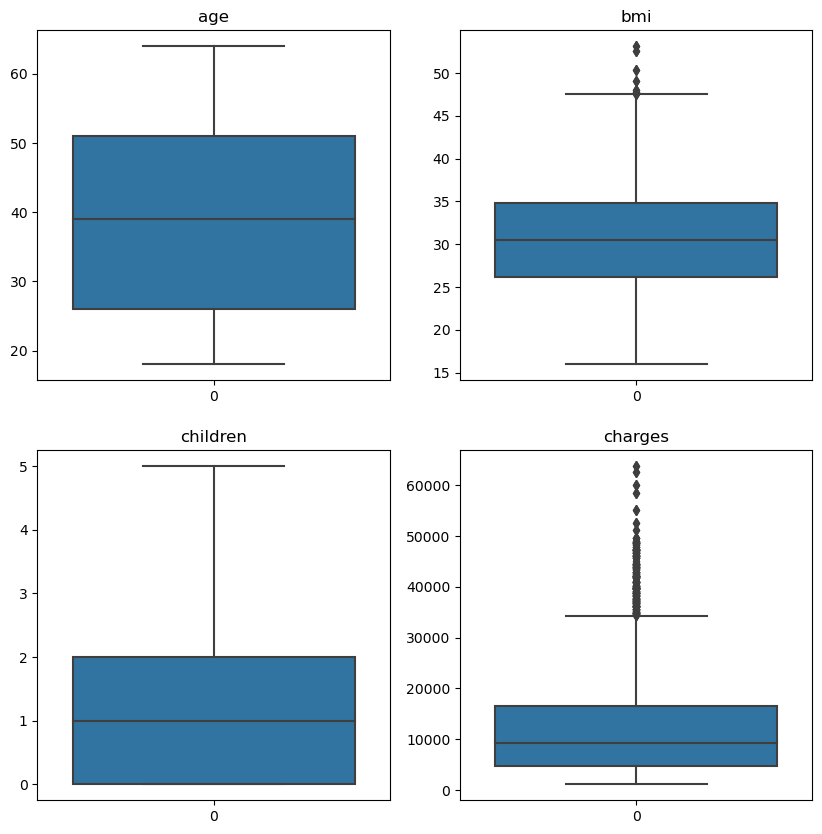

In [25]:
# Boxplots
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplot(2, 2, 1)
sns.boxplot(df['age']).set(title='age')
plt.subplot(2, 2, 2)
sns.boxplot(df['bmi']).set(title='bmi')
plt.subplot(2, 2, 3)
sns.boxplot(df['children']).set(title='children')
plt.subplot(2, 2, 4)
sns.boxplot(df['charges']).set(title='charges')
plt.show()

## 6. Model Building

In [26]:
# Design matrices
X = df.loc[:, df.columns != "charges"].values
y = df.loc[:, df.columns == "charges"].values

In [27]:
print(df.head())
print(X[0])
print(y[0])

   age     bmi  children      charges  sex  smoker  region1  region2  region3
0   19  27.900         0  16884.92400    0       1        0        0        1
1   18  33.770         1   1725.55230    1       0        0        1        0
2   28  33.000         3   4449.46200    1       0        0        1        0
3   33  22.705         0  21984.47061    1       0        1        0        0
4   32  28.880         0   3866.85520    1       0        1        0        0
[19.  27.9  0.   0.   1.   0.   0.   1. ]
[16884.924]


In [28]:
# Padding 1 column in X to account for constant term
# Number of rows in the array
num_rows = X.shape[0]

# Create a column vector of ones
ones_column = np.ones((num_rows, 1))

# Add the column of ones to the original array to account for bias
X1 = np.hstack((X, ones_column))

print(X1)

[[19.    27.9    0.    ...  0.     1.     1.   ]
 [18.    33.77   1.    ...  1.     0.     1.   ]
 [28.    33.     3.    ...  1.     0.     1.   ]
 ...
 [19.    26.03   1.    ...  0.     0.     1.   ]
 [23.    18.715  0.    ...  0.     0.     1.   ]
 [54.    31.6    0.    ...  0.     1.     1.   ]]


In [29]:
# Least Square estimation by solving the closed form solution
beta_cap = np.dot((np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T)),y)
beta_cap

array([[   255.57686411],
       [   330.01529325],
       [   506.34254892],
       [   -56.94370305],
       [ 23976.19710395],
       [  -331.8408172 ],
       [ -1078.36180852],
       [ -1055.25370947],
       [-11635.45117737]])

### WE ASSUME THE ERROR EPSILON FOLLOWS N(0,SIGMA_SQUARE)
### ESTIMATION OF SIGMA_SQUARE -

In [30]:
SSE = np.dot(y.T,y) - np.dot(np.dot(beta_cap.T,X1.T),y)
sigma_cap_square = SSE[0][0] / (y.shape[0]-beta_cap.shape[0])
sigma_cap_square

36885066.53895064

# Hypothesis testing
### H0: beta0 = beta1 = ... = beta8 = 0  vs H1 : betaj != 0 for atleast one j

In [31]:
def F_stat(X,y,beta_cap):
    SSE = (y.T).dot(y) - np.dot((beta_cap.T).dot(X.T),y)
    SSR = np.dot((beta_cap.T).dot(X.T),y) - (sum(y)**2)/y.shape[0]
    f0 = (SSR/X.shape[1]-1) / (SSE/ (X.shape[0]-X.shape[1]-1))
    return f0

In [32]:
f0 = F_stat(X1,y,beta_cap)
f0

array([[925.26581929]])

# VARIABLE SELECTION :-
## STEPWISE REGRESSION

In [33]:
def calculate_statistics(X,y,j,index):

  # Without including j-th variable
  X_1 = X[:,index]
  beta_cap = np.dot((np.dot(np.linalg.inv(np.dot(X_1.T,X_1)),X_1.T)),y)
  SSR = np.dot(np.dot(beta_cap.T,X_1.T),y) - np.power(np.sum(y),2) / y.shape[0]

  # Including j-th variable
  index = (index+[j])
  index.sort()
  X_2 = X[:,index ]
  beta_cap_updated = np.dot((np.dot(np.linalg.inv(np.dot(X_2.T,X_2)),X_2.T)),y)
  SSR_updated = np.dot(np.dot(beta_cap_updated.T,X_2.T),y) - np.power(np.sum(y),2) / y.shape[0]

  SSR_improved = SSR_updated - SSR

  MSE_both = (np.dot(y.T,y) - np.dot(np.dot(beta_cap_updated.T, X_2.T),y)) / (y.shape[0]-beta_cap_updated.shape[0])

  return SSR_improved[0][0] / MSE_both[0][0]

def calculate_statistics2(X,y,j,index):

  new_index=index[:]
  new_index.remove(j)
  # Without including j-th variable
  X_1 = X[:,new_index]
  beta_cap = np.dot((np.dot(np.linalg.inv(np.dot(X_1.T,X_1)),X_1.T)),y)
  SSR = np.dot(np.dot(beta_cap.T,X_1.T),y) - np.power(np.sum(y),2) / y.shape[0]

  # Including j-th variable
  new_index = (new_index+[j])
  new_index.sort()
  X_2 = X[:,new_index]
  beta_cap_updated = np.dot((np.dot(np.linalg.inv(np.dot(X_2.T,X_2)),X_2.T)),y)
  SSR_updated = np.dot(np.dot(beta_cap_updated.T,X_2.T),y) - np.power(np.sum(y),2) / y.shape[0]

  SSR_improved = SSR_updated - SSR

  MSE_both = (np.dot(y.T,y) - np.dot(np.dot(beta_cap_updated.T, X_2.T),y)) / (y.shape[0]-beta_cap_updated.shape[0])

  return SSR_improved[0][0] / MSE_both[0][0]


In [34]:
# Forward-backward
def backward_elimination(X1,y,alpha,index):

  # Define degrees of freedom for numerator and denominator of F distribution for F-Test
  dfn = 1  # Degrees of freedom for the numerator
  dfd = X1.shape[0]-X1.shape[1]  # Degrees of freedom for the denominator

  # Find the F-distribution value associated with given Level of significance also called f_in
  f_out = f.ppf(1-alpha, dfn, dfd)
  for j in index:
        f1 = calculate_statistics2(X1,y,j,index)
        if f1 < f_out:
            index.remove(j)
            print("Removed",j,f1,f_out)
  return index

def forward_selection(X1,y,alpha):

  # Define degrees of freedom for numerator and denominator of F distribution for F-Test
  dfn = 1  # Degrees of freedom for the numerator
  dfd = X1.shape[0]-X1.shape[1]  # Degrees of freedom for the denominator

  # Find the F-distribution value associated with given Level of significance also called f_in
  f_in = f.ppf(1-alpha, dfn, dfd)

  # Start with last column i.e., bias
  index = [X1.shape[1]-1]

  # We'll check for all
  indices = [j for j in range(X1.shape[1]-1)]

  max_ssr = np.inf  # random initialization
  # Iterate till indices are left to check as well as improved test statistics > threshold f-value i.e., F-test is passsed
  while indices and max_ssr > f_in :

    # Initially all stat values are 0
    stat = [0]*(X1.shape[1]-1)
    for j in indices:
      # print(j, calculate_statistics(X1,y,j,index))
      stat[j] = calculate_statistics(X1,y,j,index)

    # Who has maximum statistics value to be added if satisfy the test
    max_ssr = max(stat)
    if max_ssr < f_in :
      break
    index_added = stat.index(max_ssr)

    # Necessray updates
    index.append(index_added)
    indices.remove(index_added)
    index.sort()

    # Which indices are added and its F-test value
    if len(index) > 1:
        index = backward_elimination(X1,y,alpha,index)

  return index

def selected_variables_by_stepwise_reg(alpha,df):

  X = df.loc[:, df.columns != "charges"].values
  y = df.loc[:, df.columns == "charges"].values

  num_rows = X.shape[0]
  ones_column = np.ones((num_rows, 1))
  X1 = np.hstack((X, ones_column))

  indices = forward_selection(X1,y,alpha)

  print("By stepwise regression selected variables are-",end=" ")
  for i in indices:
    if i == X1.shape[1]-1:
      continue
    column_name = (df.drop(columns=['charges'],inplace=False)).columns[i]
    print(column_name,end=" ")

  return indices

In [35]:
indices = selected_variables_by_stepwise_reg(0.10,df)

By stepwise regression selected variables are- age bmi children smoker region2 region3 

## ALL POSSIBLE REGRESSIONS

In [36]:
# def calculate_press(model,X,y):
#     from sklearn.model_selection import LeaveOneOut
#     from sklearn.metrics import mean_squared_error
#     import numpy as np

#     # Initialize Leave-One-Out Cross-Validation
#     loo = LeaveOneOut()
#     X = X.values
#     y = y.values

#     # Initialize a list to store the squared prediction errors
#     press_errors = []

#     # Perform Leave-One-Out Cross-Validation
#     for train_index, test_index in loo.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]

#         model.fit(X_train, y_train)

#         # Predict on the left-out sample
#         y_pred = model.predict(X_test)

#         # Calculate squared prediction error (SPE)
#         spe = (y_test - y_pred) ** 2

#         # Append SPE to the list of errors
#         press_errors.append(spe)

#     # Calculate PRESS value
#     press_value = np.sum(press_errors)
#     return press_value


def calculate_r(X, y,model_given):
    best_adj_r_squared = -np.inf
    best_features = None

    models = pd.DataFrame({'Features': [],
                   'R2': [],'Adjusted_R2':[]})

    for k in range(1, len(X.columns) + 1):
        for subset in itertools.combinations(X.columns, k):
            model = model_given.fit(X[list(subset)], y)
            y_pred = model.predict(X[list(subset)])
            r_squared = r2_score(y, y_pred)
            n = len(y)
            p = k + 1  # including the intercept term
            adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
            PRESS = 0

            models = pd.concat([models, pd.DataFrame({'Features': [subset],'R2': [r_squared], 'Adjusted_R2': [adj_r_squared]})], ignore_index=True)

            # if adj_r_squared > best_adj_r_squared:
            #     best_adj_r_squared = adj_r_squared
            #     best_features = subset

    return models

def all_possible_reg(dataset,model_given):

  # Separate predictors (X) and target variable (y)
  X_new = df.drop(columns=['charges'])
  y_new = df['charges']

  # Calculate adjusted R-squared and selected features
  all_models = calculate_r(X_new, y_new, model_given)
  all_models = all_models.sort_values(by='Adjusted_R2',ascending=False)
  # Print the results
  return all_models

In [37]:
all_models = all_possible_reg(df,LinearRegression())
all_models.head()

,Features,R2,Adjusted_R2
226,"(age, bmi, children, smoker, region2, region3)",0.750839,0.750208
250,"(age, bmi, children, smoker, region1, region2,...",0.750928,0.750207
248,"(age, bmi, children, sex, smoker, region2, reg...",0.750844,0.750123
254,"(age, bmi, children, sex, smoker, region1, reg...",0.750933,0.750122
167,"(age, bmi, children, smoker, region2)",0.749979,0.749436


In [38]:
# Selected Features
X_selected = X1[:,indices]
X_selected

array([[19.   , 27.9  ,  0.   , ...,  0.   ,  1.   ,  1.   ],
       [18.   , 33.77 ,  1.   , ...,  1.   ,  0.   ,  1.   ],
       [28.   , 33.   ,  3.   , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [19.   , 26.03 ,  1.   , ...,  0.   ,  0.   ,  1.   ],
       [23.   , 18.715,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [54.   , 31.6  ,  0.   , ...,  0.   ,  1.   ,  1.   ]])

In [39]:
# Least Square estimation by solving the closed form solution
beta_cap = np.dot((np.dot(np.linalg.inv(np.dot(X_selected.T,X_selected)),X_selected.T)),y)
print(beta_cap)
SSE = np.dot(y.T,y) - np.dot(np.dot(beta_cap.T,X_selected.T),y)
sigma_cap_square = SSE[0][0] / (y.shape[0]-beta_cap.shape[0])
sigma_cap_square

[[   255.68352332]
 [   329.81506945]
 [   502.8468255 ]
 [ 23977.71938219]
 [  -912.55886411]
 [  -888.3374359 ]
 [-11825.3093394 ]]


36872264.57017718

In [40]:
# Calculating standardized Residuals
y_pred = np.dot(beta_cap.T,X_selected.T).T
e=(y_pred-y)
H = X_selected.dot(np.linalg.inv((X_selected.T).dot(X_selected))).dot(X_selected.T)
for i in range(e.shape[0]):
    e[i][0] = e[i][0] / (sigma_cap_square * (1 - H[i][i]) )** 0.5
e

array([[ 1.39257368],
       [ 0.29340072],
       [ 0.38986843],
       ...,
       [ 1.59112871],
       [-3.5234269 ],
       [ 0.27450663]])

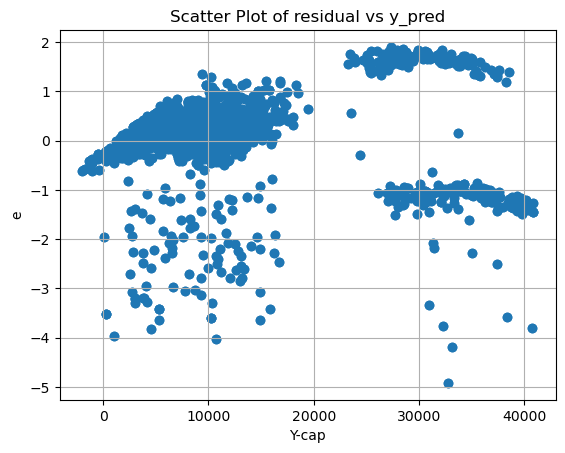

In [41]:
# Create resdual plot
plt.scatter(y_pred, e)
plt.xlabel('Y-cap')
plt.ylabel('e')
plt.title('Scatter Plot of residual vs y_pred')
plt.grid(True)
plt.show()

In [42]:
# Influential Points Check by cook's distance
beta_cap = np.dot((np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T)),y)

def cooks_distance(X, y):

  points = pd.DataFrame({'Points': [],
                   'Cook_Dist': []})

  for i in range(X.shape[0]):

    X_updated = np.delete(X, i, axis=0)
    y_updated = np.delete(y, i, axis=0)

    beta_cap_updated =  np.dot((np.dot(np.linalg.inv(np.dot(X_updated.T,X_updated)),X_updated.T)),y_updated)
    D_i = ((beta_cap_updated - beta_cap).T).dot(np.dot(X.T,X)).dot((beta_cap_updated - beta_cap)) / ( X1.shape[1] * sigma_cap_square)

    points = pd.concat([points, pd.DataFrame({'Points': [i], 'Cook_Dist': [D_i[0][0]]})], ignore_index=True)

  return points


# Calculate Cook's distance
points = cooks_distance(X1, y)

# Print Cook's distance for each observation
points = points.sort_values(by='Cook_Dist',ascending=False)
points.head(10)


,Points,Cook_Dist
543,543.0,0.009342
1929,1929.0,0.009342
2686,2686.0,0.008993
1300,1300.0,0.008993
577,577.0,0.008819
1963,1963.0,0.008819
2205,2205.0,0.007079
819,819.0,0.007079
1230,1230.0,0.006702
2616,2616.0,0.006702


### Cook's distances are very small so no influential points

# CONFIDENCE INTERVAL FOR REGRESSION COEFFICIENTS

In [43]:
# 95% CI

# Degrees of freedom
dof = X1.shape[0]-X1.shape[1]  # Example value, replace it with your degrees of freedom

# Alpha value (significance level)
alpha = 0.05  # Example value, replace it with your alpha value

# Calculate the t-value
t_value = t.ppf(1 - alpha/2, dof)

In [44]:
coeff_confidence_interval = pd.DataFrame({'variable':[],'lower_limit':[],'upper_limit':[]})
C = np.linalg.inv((X1.T).dot(X1))
beta_cap = np.dot((np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T)),y)
df =  df.drop(columns=['charges'])
for i in range(X1.shape[1]):
  lower = beta_cap[i][0] - (t_value * ((C[i][i] * sigma_cap_square)**(0.5) ))
  upper = beta_cap[i][0] + (t_value * ((C[i][i] * sigma_cap_square)**(0.5) ))
  if i < X1.shape[1]-1 :
    coeff_confidence_interval = pd.concat([coeff_confidence_interval, pd.DataFrame({'variable': [df.columns[i]],
                                                                                  'lower_limit': [lower],
                                                                                  'upper_limit': [upper],})], ignore_index=True)
  else :
    coeff_confidence_interval = pd.concat([coeff_confidence_interval, pd.DataFrame({'variable': ["Bias"],
                                                                                  'lower_limit': [lower],
                                                                                  'upper_limit': [upper],})], ignore_index=True)
coeff_confidence_interval

,variable,lower_limit,upper_limit
0,age,239.368500,271.785228
1,bmi,291.061963,368.968624
2,children,319.776053,692.909045
3,sex,-511.513544,397.626138
4,smoker,23410.673666,24541.720542
5,region1,-987.387092,323.705458
6,region2,-1733.982140,-422.741477
7,region3,-1708.332271,-402.175148
8,Bias,-12982.076946,-10288.825409


# RIDGE REGRESSION

In [45]:
# Create and fit the Ridge regression model
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)

# Predict on the test set
y_pred = ridge_model.predict(X)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
e = y-y_pred

Mean Squared Error: 36765780.471895844


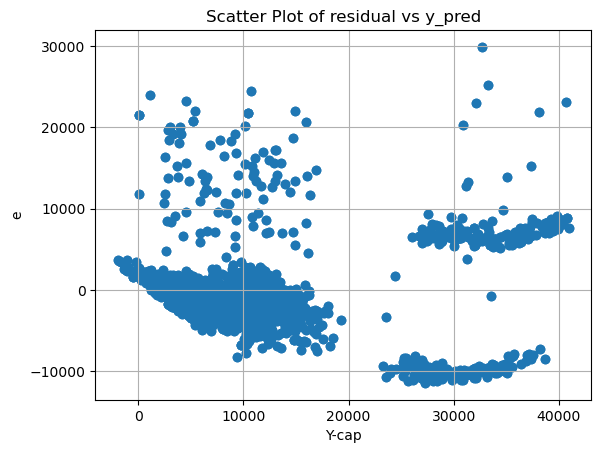

In [46]:
# Create scatter plot
plt.scatter(y_pred, e)
plt.xlabel('Y-cap')
plt.ylabel('e')
plt.title('Scatter Plot of residual vs y_pred')
plt.grid(True)
plt.show()

# LASSO REGRESSION

In [47]:
# Create and fit the ElasticNet model with L1 penalty
alpha = 1.0  # Regularization strength
l1_ratio = 1.0  # Ratio of L1 to L2 penalty. 1.0 means pure L1 penalty (Lasso)
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_model.fit(X, y)

# Predict on the test set
y_pred = elastic_net_model.predict(X)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
e = (y.T)-y_pred

Mean Squared Error: 36765373.354261234


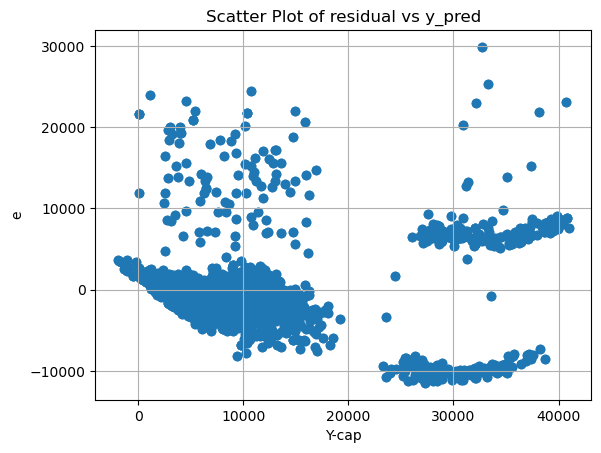

In [48]:
# Create scatter plot
plt.scatter(y_pred, e)
plt.xlabel('Y-cap')
plt.ylabel('e')
plt.title('Scatter Plot of residual vs y_pred')
plt.grid(True)
plt.show()